In [1]:
import pandas as pd #analisis de datos
import numpy as np #operaciones matematicas con vectores y matrices
from sklearn import linear_model #facilita modelos matematicos de algoritmos de regresion
from sklearn import model_selection#facilita la division del dataset en subsets
from sklearn.metrics import classification_report#construye un reporte con las principales metricas
from sklearn.metrics import confusion_matrix#calcula la matriz de confusion
from sklearn.metrics import accuracy_score #calcula la puntuacion de la exactitud de las predicciones
import matplotlib.pyplot as plt#genera graficas
import seaborn as sb#basada en  matplotlib, genera graficas visualmente más atractivas
from sklearn.decomposition import PCA #extencion de sklearn para principal component analysis
from sklearn.preprocessing import StandardScaler #extencion de sklearn para estandarizar
%matplotlib inline
dataframe = pd.read_csv("../comprar_alquilar.csv") # se lee el dataset csv
dataframe.head() # se imprime los primeros 10 registros


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [4]:
dataframe.describe() #obtiene los datos estadisticos que describen al dataframe

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [6]:
print(dataframe.groupby('comprar').size()) #se generan los grupos para la columna "comprar"

comprar
0    135
1     67
dtype: int64


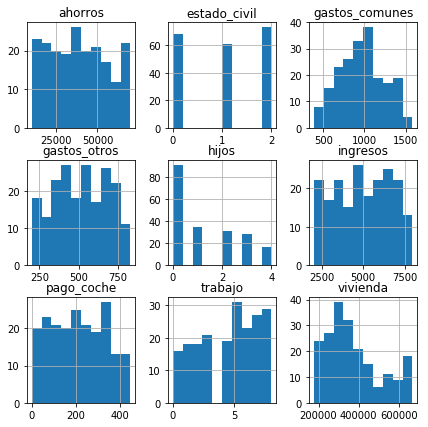

In [7]:
dataframe.drop(['comprar'],1).hist(figsize=(7,7)) # Se remueve la columna comprar
plt.show()

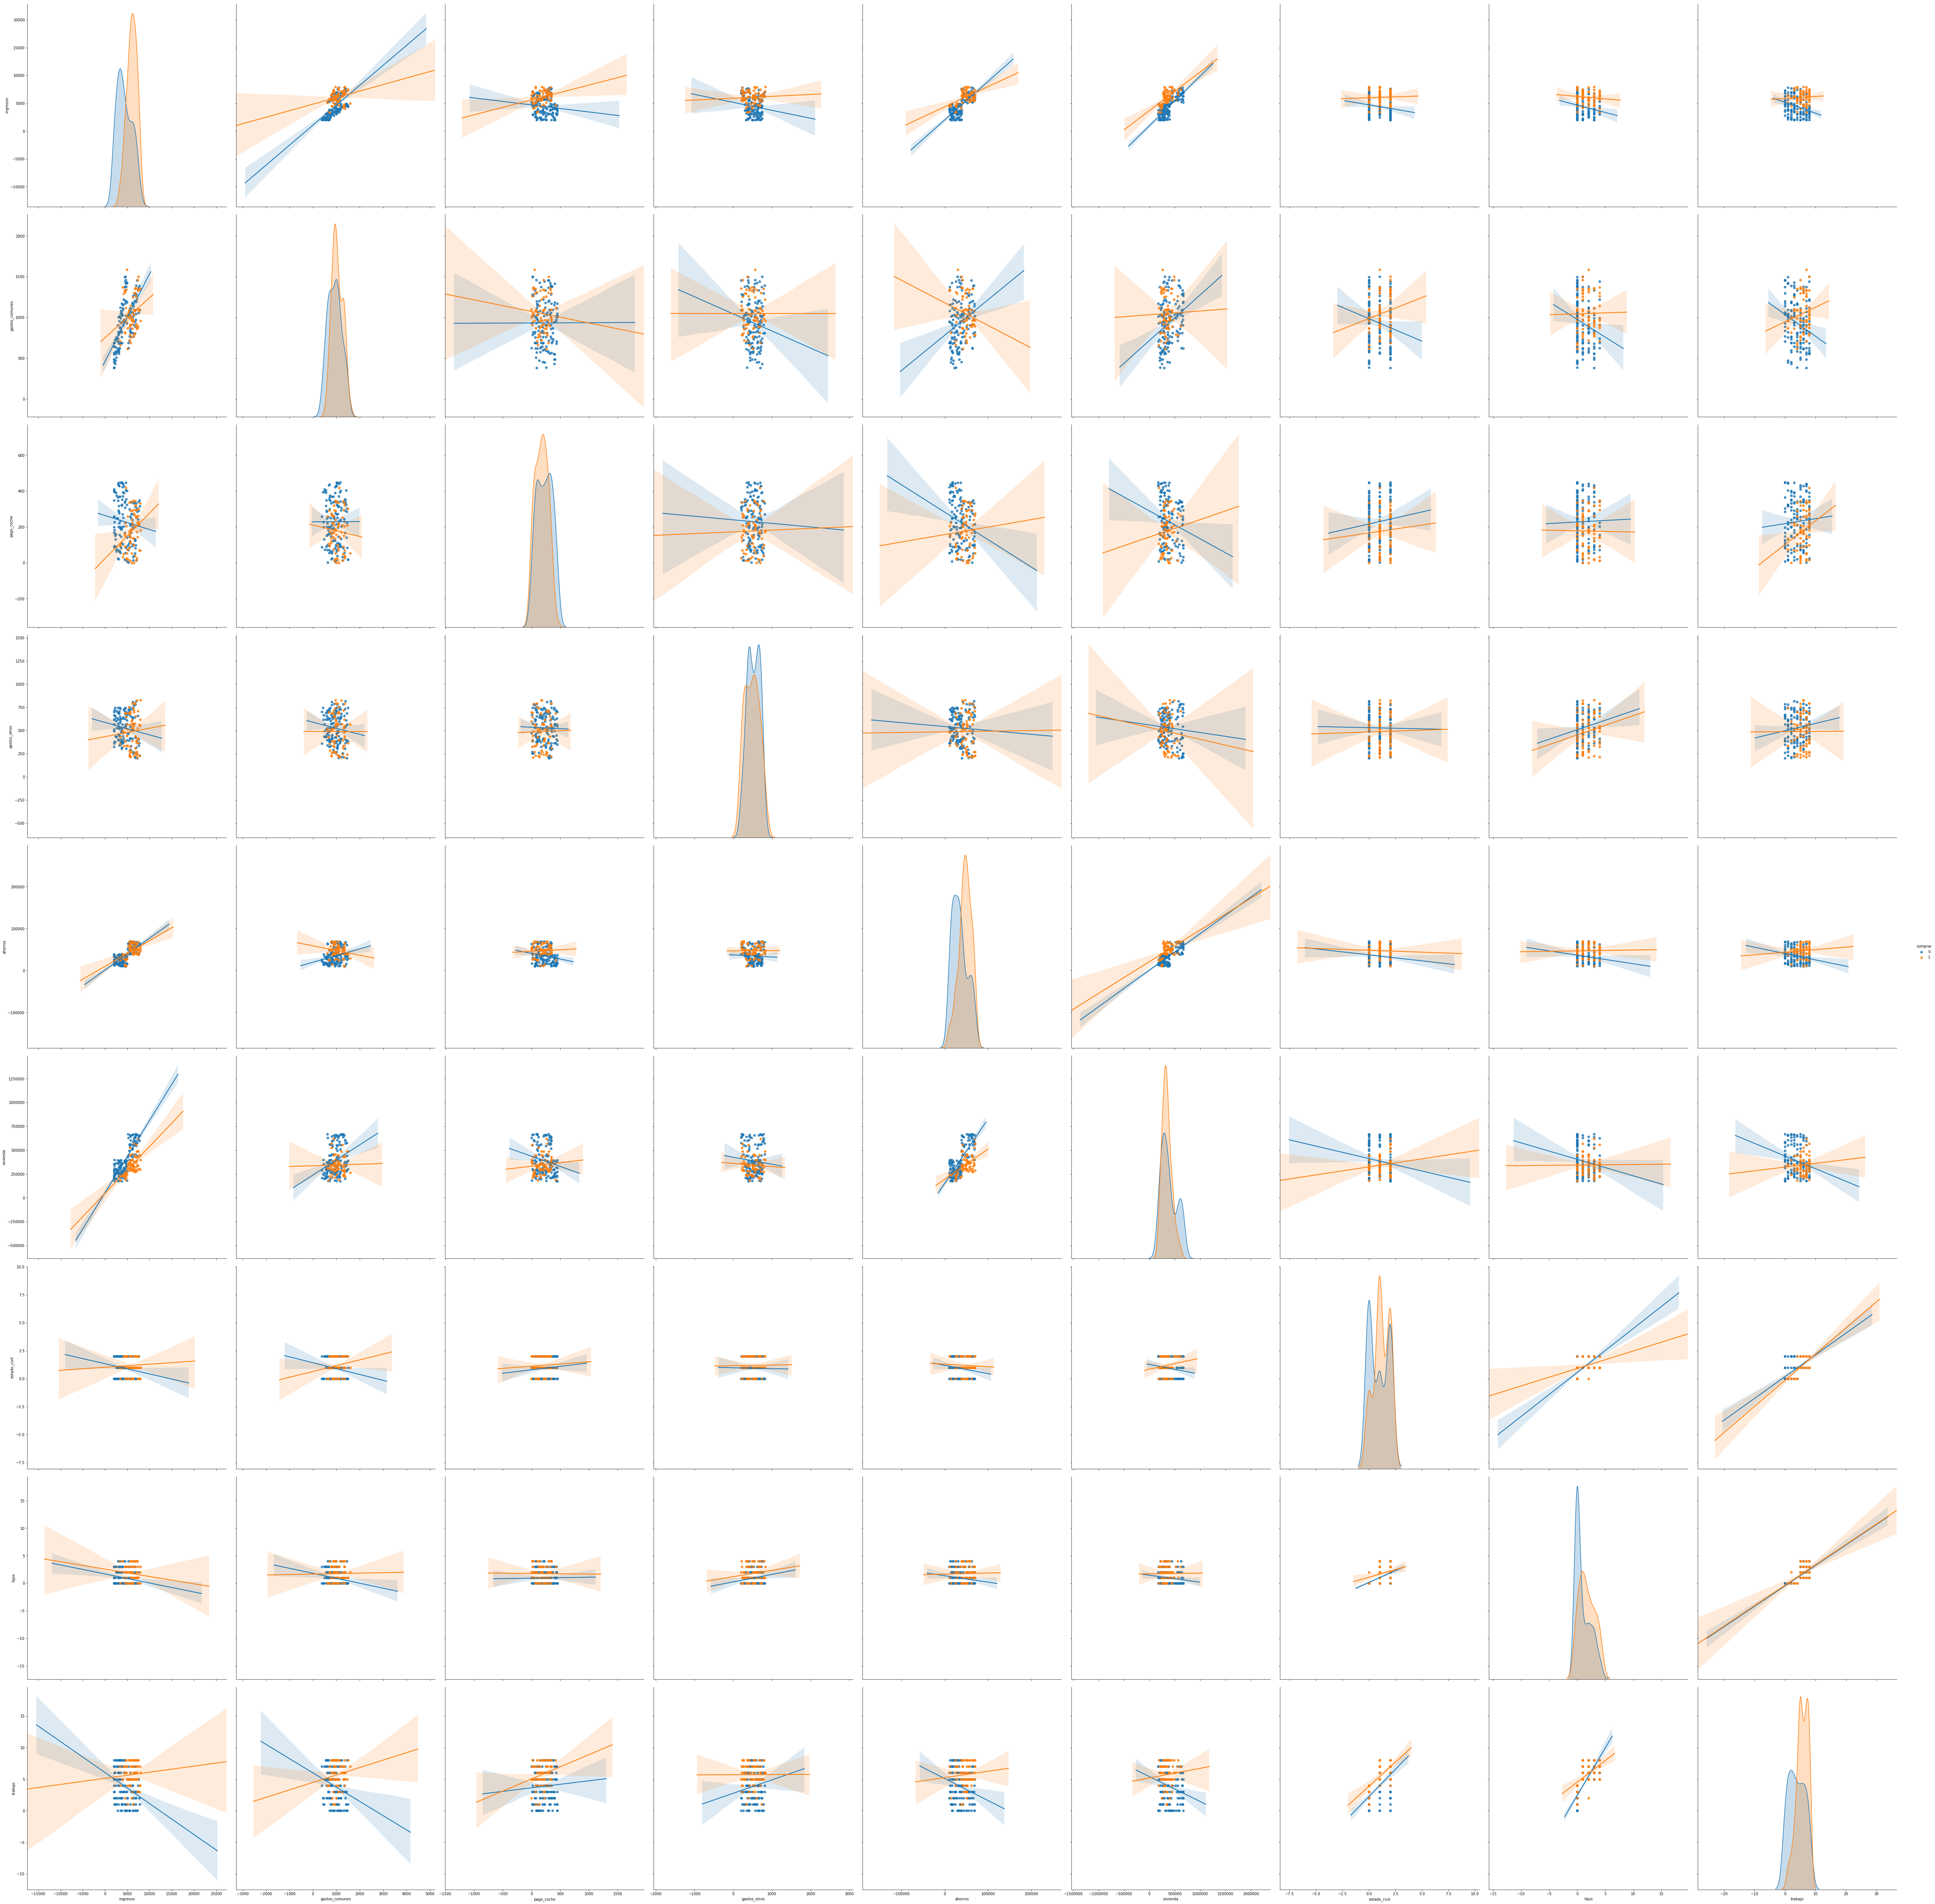

In [3]:
sb.pairplot(dataframe.dropna(), hue='comprar',height=8,vars=["ingresos", "gastos_comunes","pago_coche","gastos_otros","ahorros", "vivienda","estado_civil","hijos","trabajo"],kind='reg')
#interrelacionar en pares las variables


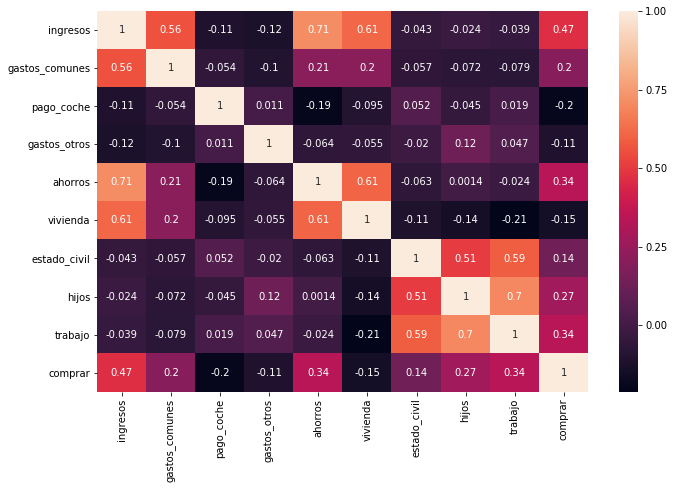

In [87]:
correlation_mat = dataframe.corr() #se calcula la correlacion en el dataframe y se almacena en correlation_mat
plt.subplots(figsize=(11,7)) #se establece el tamaño maximo del mapa de calor
sb.heatmap(correlation_mat, annot = True,) #se genera el mapa de calor en base en  la correlacion del dataframe
plt.show() # se muestra la grafica

In [2]:
X = np.array(dataframe.drop(['comprar'],1)) ## X con la que se entrena sin PCA
y = np.array(dataframe['comprar']) # Variable predictora
print("head of array X",X[:10])
print("head of array y",y[:10])


head of array X [[  6000   1000      0    600  50000 400000      0      2      2]
 [  6745    944    123    429  43240 636897      1      3      6]
 [  6455   1033     98    795  57463 321779      2      1      8]
 [  7098   1278     15    254  54506 660933      0      0      3]
 [  6167    863    223    520  41512 348932      0      0      3]
 [  5692    911     11    325  50875 360863      1      4      5]
 [  6830   1298    345    309  46761 429812      1      1      5]
 [  6470   1035     39    782  57439 606291      0      0      1]
 [  6251   1250    209    571  50503 291010      0      0      3]
 [  6987   1258    252    245  40611 324098      2      1      7]]
head of array y [1 0 1 0 1 1 1 0 1 1]


In [34]:
scaler=StandardScaler()# Instancia para normalizar los datos

scaler.fit(X) # calculo la media y estandar para escalar posteriormente
X_scaled=scaler.transform(X)# Se realiza la estandarizacion, centrando y escalando

#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=9) # se instancia el PCA, con el numero de variables que tiene el dataset
pca.fit(X_scaled) # entrena el modelo con los valores escalados 
X_pca=pca.transform(X_scaled) # y aplica la reduccion de dimensiones

print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_ #regresa un vector de la varianza explicada en cada dimension
print(expl) #se imprime lo anterior
print('suma:',expl[0:5].sum())#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada


shape of X_pca (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma: 0.852406211771431


/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [69]:
model = linear_model.LogisticRegression(solver='lbfgs') #instancia modelo de regresion logistica
model.fit(X,y) #entrena modelo de regresion logistica
##############################################################
modelconPCA=linear_model.LogisticRegression(solver='lbfgs') #modelo de regresion logistica que usara PCA
modelconPCA.fit(X_pca[:,0:5],y)
print(X_pca[:,0:5].shape)

(202, 5)


/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [66]:
predictions = model.predict(X)
print("predicciones sin PCA",predictions[0:15])
######################################
predictionsConPCA=modelconPCA.predict(X_pca[:,0:5])
print("predicciones con PCA",predictionsConPCA[0:15])

predicciones sin PCA [1 0 1 0 1 1 1 0 1 1 0 0 0 1 0]
predicciones con PCA [0 1 1 1 0 1 1 0 0 1 0 0 1 1 1]


In [67]:
print("SCORE SIN PCA",model.score(X,y))
print("SCORE CON PCA",modelconPCA.score(X_pca[:,0:5],y))

SCORE SIN PCA 0.905940594059406
SCORE CON PCA 0.7920792079207921


In [68]:
#### sin pca ###
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

#### con pca ######
validation_size = 0.20
seed = 7
X_trainPCA, X_validationPCA, Y_trainPCA, Y_validationPCA = model_selection.train_test_split(X_scaled[:,0:5], y, test_size=validation_size, random_state=seed)


In [70]:
####SIN PCA #####
name='madia y desviacion estandar con regresion logistica con muestras aleatorias sin pca'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
##### CON PCA ###
namePCA='media y desviacion estandar con regresion logistica con muestras aleatorias con pca'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_trainPCA, Y_trainPCA, cv=kfold, scoring='accuracy')
msgPCA = "%s: %f (%f)" % (namePCA, cv_results.mean(), cv_results.std())
print(msgPCA)

/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/ricardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

madia y desviacion estandar con regresion logistica con muestras aleatorias sin pca: 0.906250 (0.057622)
media y desviacion estandar con regresion logistica con muestras aleatorias con pca: 0.652941 (0.093417)


In [74]:
### sin pca###
predictions = model.predict(X_validation)
print("Exactitud sin pca",accuracy_score(Y_validation, predictions))
### con pca###
predictionsPCA = modelconPCA.predict(X_validationPCA)
print("exactitud con pca",accuracy_score(Y_validationPCA, predictionsPCA))

Exactitud sin pca 0.9512195121951219
exactitud con pca 0.6341463414634146


In [86]:
print("MATRIZ DE CONFUSION SIN PCA") 
print("   0   1")
print("0 ",confusion_matrix(Y_validation, predictions)[0])
print("1 ",confusion_matrix(Y_validation, predictions)[1])
#######################################
print("MATRIZ DE CONFUSION con PCA") 
print("   0   1")
print("0 ",confusion_matrix(Y_validationPCA, predictionsPCA)[0])
print("1 ",confusion_matrix(Y_validationPCA, predictionsPCA)[1])

MATRIZ DE CONFUSION SIN PCA
   0   1
0  [28  0]
1  [ 2 11]
MATRIZ DE CONFUSION con PCA
   0   1
0  [23  5]
1  [10  3]


In [45]:
print("Reporte  de metricas de clasificacion sin PCA \n",classification_report(Y_validation, predictions))
print("\n")
print("Reporte  de metricas de clasificacion con PCA \n",classification_report(Y_validationPCA, predictionsPCA))

Reporte  de metricas de clasificacion sin PCA 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.85      0.92        13

   micro avg       0.95      0.95      0.95        41
   macro avg       0.97      0.92      0.94        41
weighted avg       0.95      0.95      0.95        41



Reporte  de metricas de clasificacion con PCA 
               precision    recall  f1-score   support

           0       0.70      0.82      0.75        28
           1       0.38      0.23      0.29        13

   micro avg       0.63      0.63      0.63        41
   macro avg       0.54      0.53      0.52        41
weighted avg       0.59      0.63      0.61        41



In [88]:
#X_new se refiere a nuevos datos de entrada para ambos modelos
X_new = pd.DataFrame({'ingresos': [8000], 'gastos_comunes': [1200], 'pago_coche': [650], 'gastos_otros': [600],'ahorros': [25000], 'vivienda': [28000], 'estado_civil': [1], 'hijos': [2],  'trabajo': [4]})

#predicciones nuevas sin pca
nuevasPredicciones =model.predict(X_new)
print("Predicciones nuevas sin PCA \n",nuevasPredicciones)

#predicciones nuevas con pca
df_transformed=pca.transform(X_new)
df_transformed=df_transformed[0,0:5]

nuevasPrediccionesPCA=modelconPCA.predict([df_transformed])
print("Predicciones nuevas con PCA \n",nuevasPrediccionesPCA)  


Predicciones nuevas sin PCA 
 [1]
Predicciones nuevas con PCA 
 [1]
